In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load data of togo

In [ ]:
file_path = "../data/togo.csv"
df = pd.read_csv(file_path)
print(df.shape)

In [17]:
print( " the first five rows")
print(df.head())
print(" the last five rows")
print(df.tail())
print( " five random entries")
df.sample(5)

 the first five rows
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
193981,2022-03-08 17:02,154.4,59.8,135.6,141.7,135.4,37.7,7.3,2.6,4.1,0.6,357.0,17.7,970,0,0.0,40.6,40.2,NaN
343565,2022-06-20 14:06,831.0,604.8,281.8,719.0,710.2,32.9,58.0,3.0,4.8,0.8,201.7,12.2,977,0,0.0,51.2,52.2,NaN
68599,2021-12-11 15:20,351.7,180.0,256.7,358.4,349.3,34.5,17.6,2.5,3.1,0.4,79.8,8.9,972,0,0.0,41.5,42.1,NaN
180729,2022-02-27 12:10,838.0,429.5,431.8,853.3,785.8,35.7,34.7,4.7,6.2,0.9,173.4,10.1,975,0,0.0,55.2,54.5,NaN
249649,2022-04-16 08:50,419.2,56.2,377.7,396.0,392.2,25.5,74.7,2.9,3.6,0.5,222.9,10.8,976,0,0.0,34.5,40.0,NaN


In [18]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [19]:
# descriptive statistics on numerical columns
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [20]:
print("check missing values")
df.isna().sum()

check missing values


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

# descriptive statistics of both categorical and numerical columns

In [21]:
df.describe(include="all")

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
unique,525600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-10-25 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,NaN,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,NaN,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,NaN,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,NaN,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN


In [22]:
# lets go for duplicate rows
# duplicated().sum() is used to identify and sum duplicated rows for both numerical and categorical columns
number_of_duplicates = df.duplicated().sum()
print(f"duplicated entries are: {number_of_duplicates}")

duplicated entries are: 0


# cardinallity (uniqueness) of categoricalls. 

In [23]:
categorical_column = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {crd:df[crd].nunique() for crd in categorical_column}
print (cardinality)

{'Timestamp': 525600}


# cardinality of both categoricals and numercal columns

In [24]:
categorical_column = df.select_dtypes(include=["object", "category", "float64", "int64"]).columns.tolist()
cardinality = {crd:df[crd].nunique() for crd in categorical_column}
print (cardinality)

{'Timestamp': 525600, 'GHI': 8633, 'DNI': 9612, 'DHI': 6841, 'ModA': 10672, 'ModB': 8439, 'Tamb': 266, 'RH': 966, 'WS': 143, 'WSgust': 156, 'WSstdev': 44, 'WD': 3601, 'WDstdev': 614, 'BP': 16, 'Cleaning': 2, 'Precipitation': 22, 'TModA': 564, 'TModB': 769, 'Comments': 0}


In [25]:
# Identifying columns with missing values greater than 5 percent
missing_percent = df.isnull().mean()*100
missing_greater_than_five_percent = missing_percent[missing_percent>5]
print(missing_greater_than_five_percent)

Comments    100.0
dtype: float64


In [26]:
#Check for invalid data types
# For example, a numeric column should only contain numbers.

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    invalid = df[~df[col].apply(lambda x: isinstance(x, (int, float)))]
    if not invalid.empty:
        print(f"Invalid entries in {col}:")
        print(invalid)

# Univariate Analysis

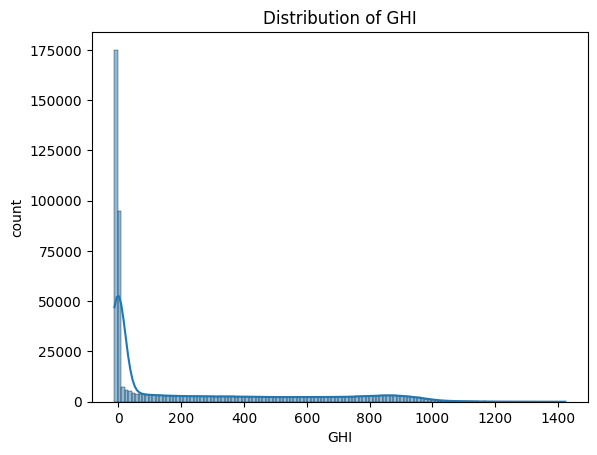

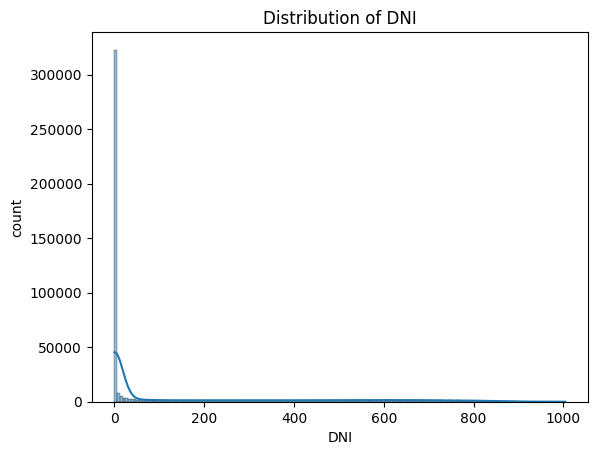

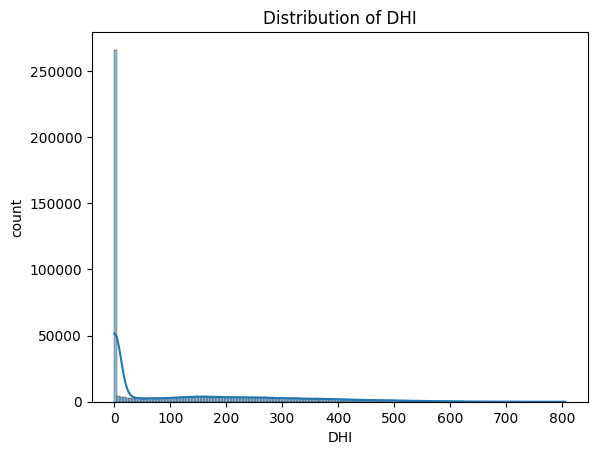

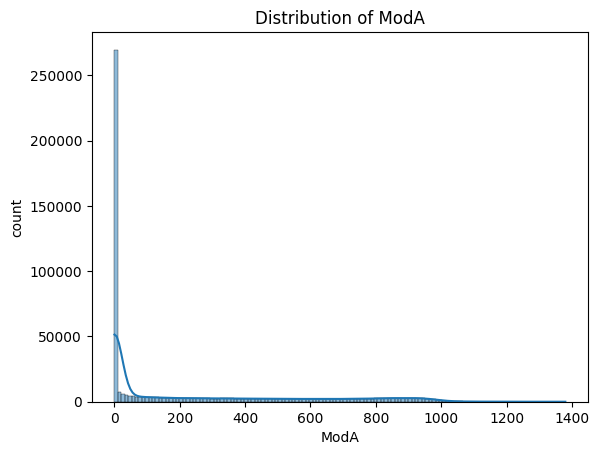

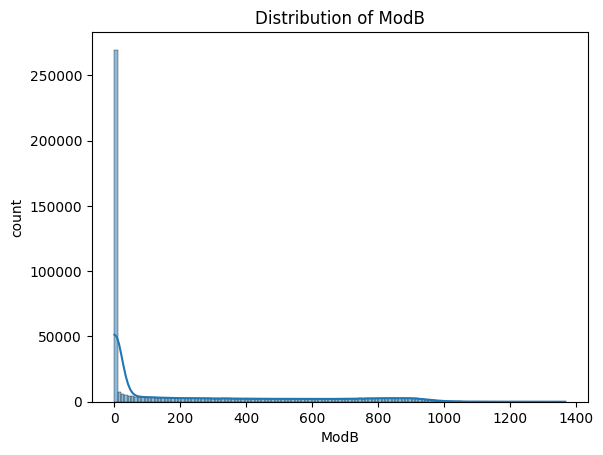

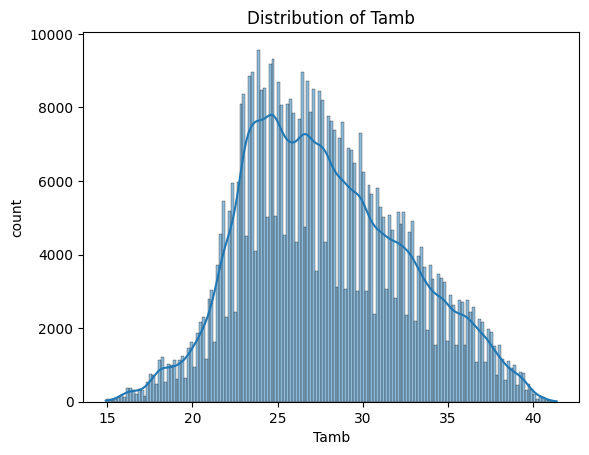

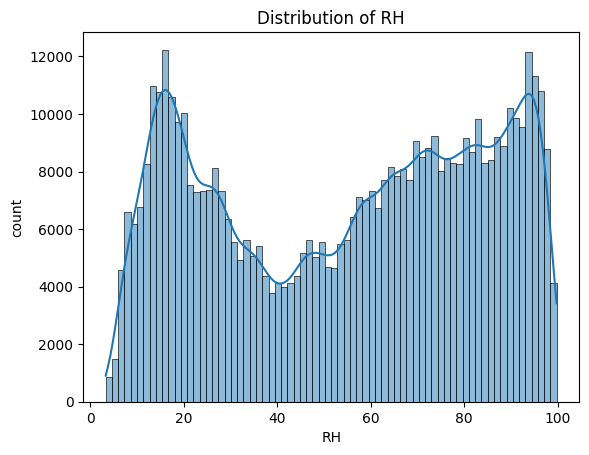

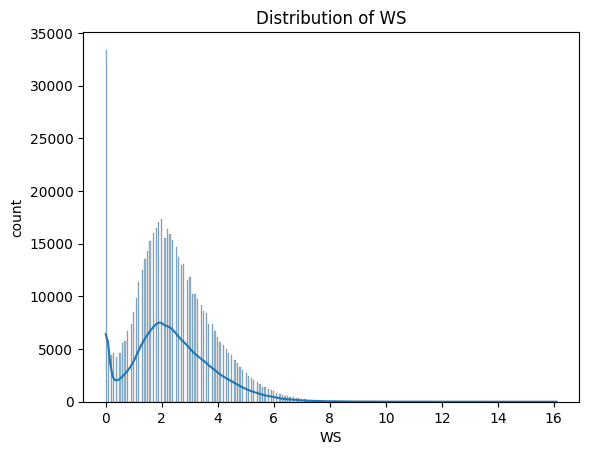

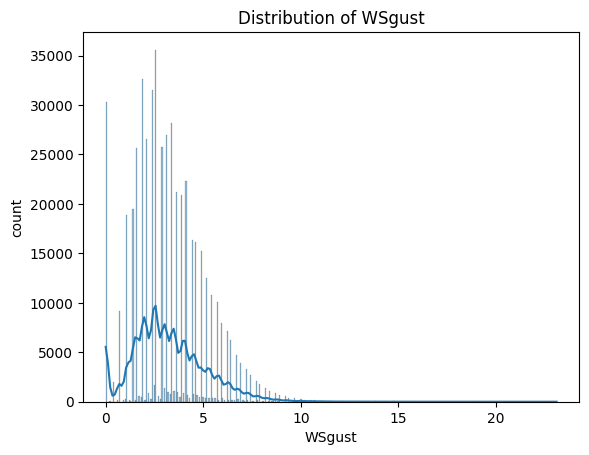

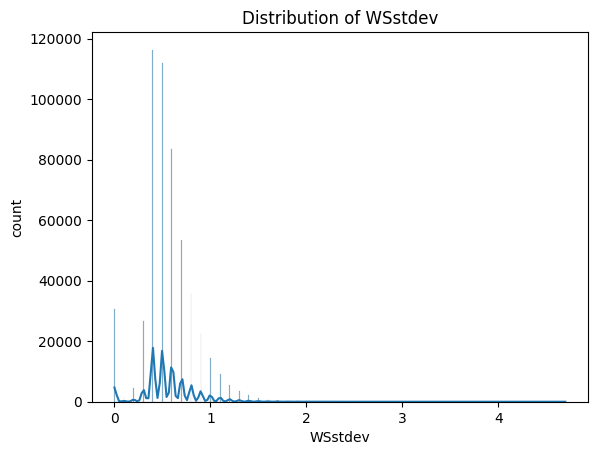

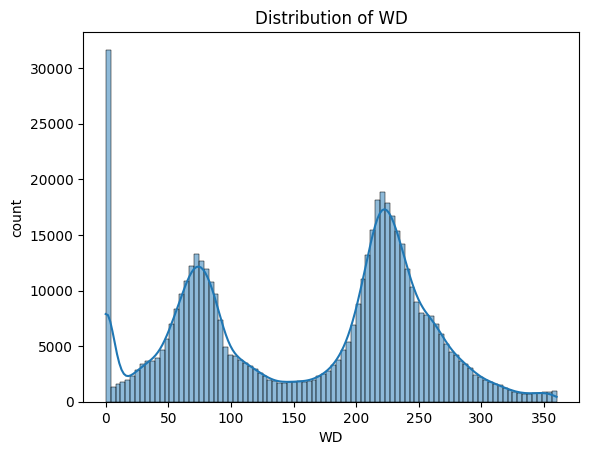

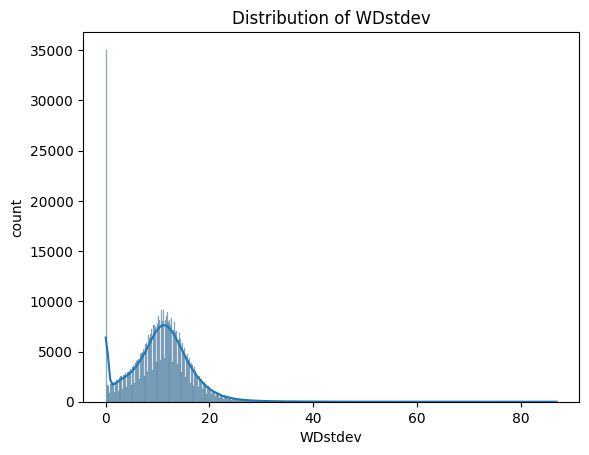

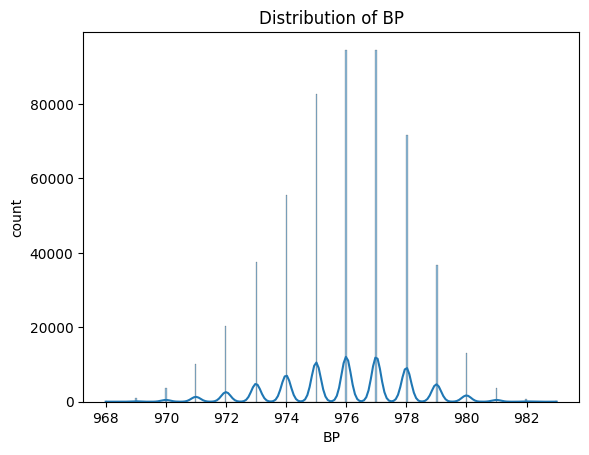

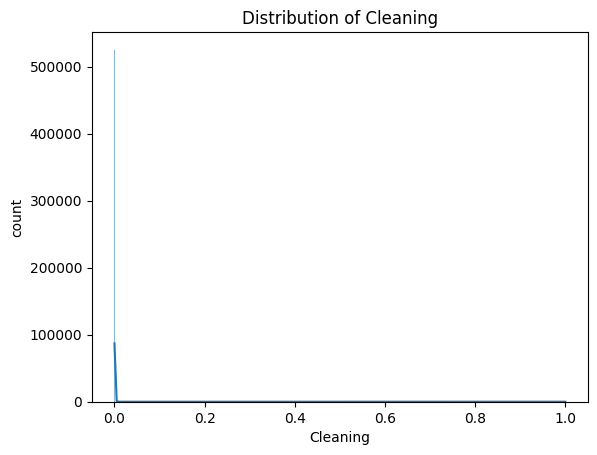

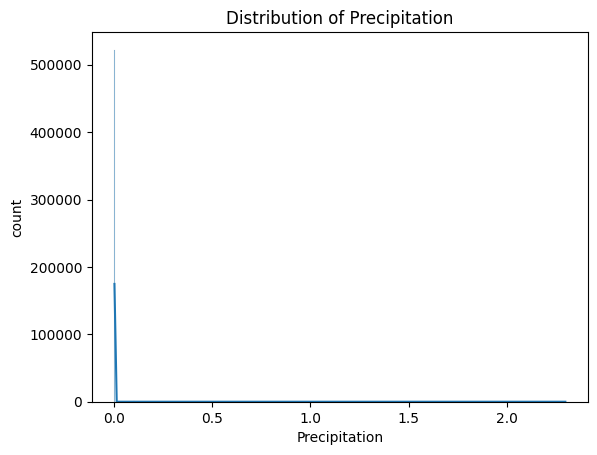

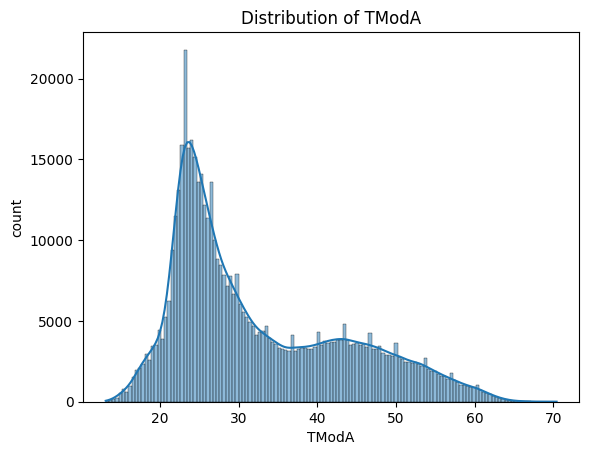

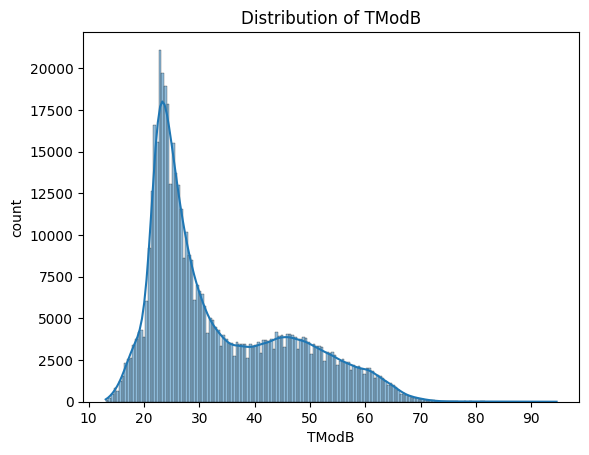

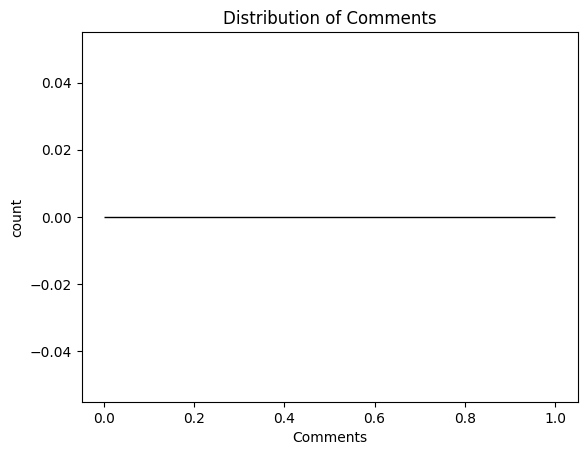

In [27]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c],kde=True)
    plt.title(f"Distribution of {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.show()

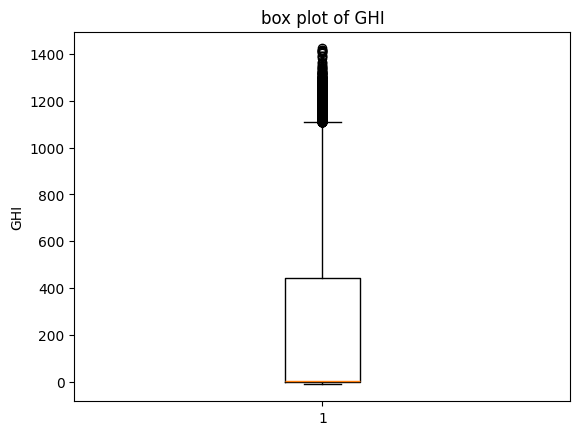

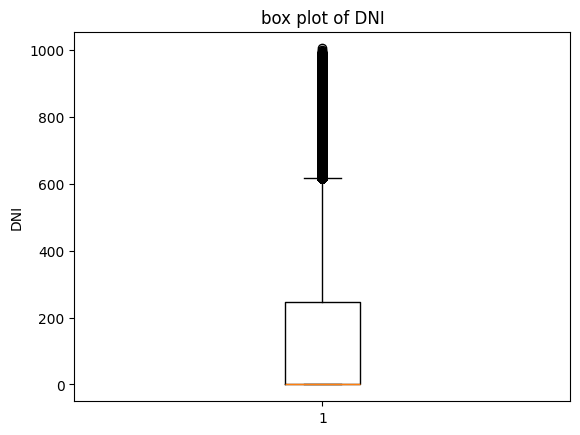

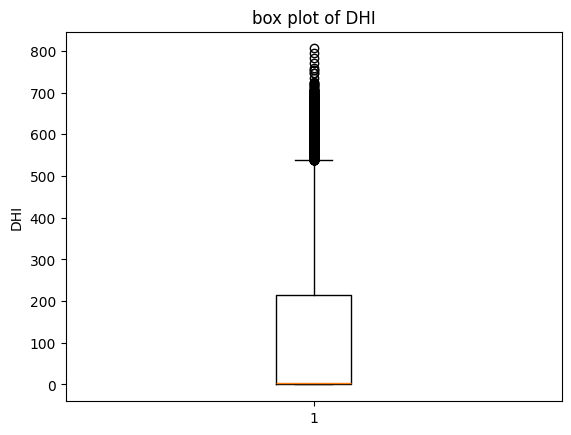

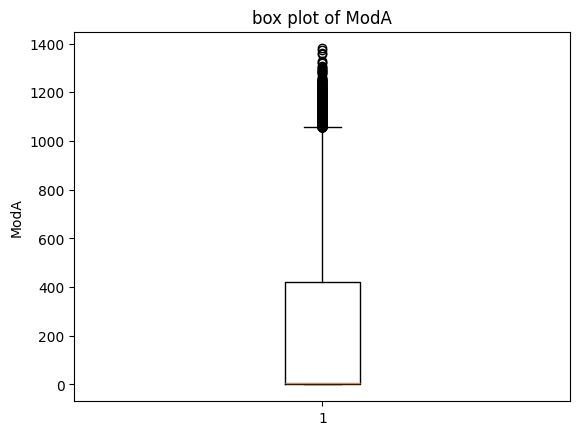

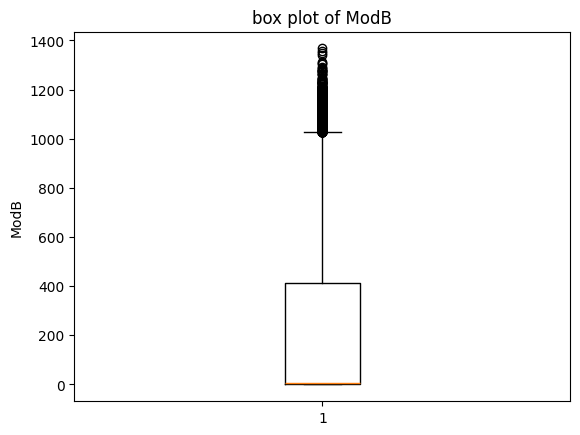

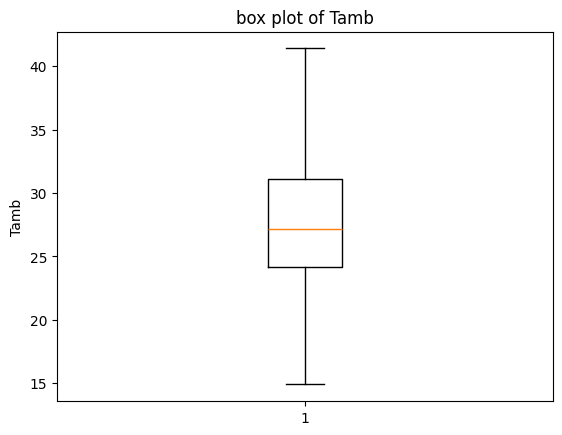

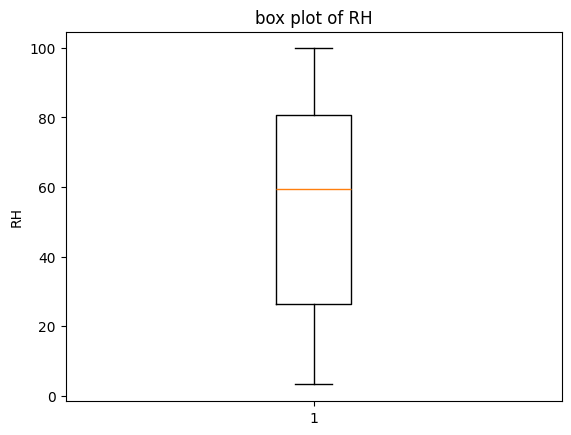

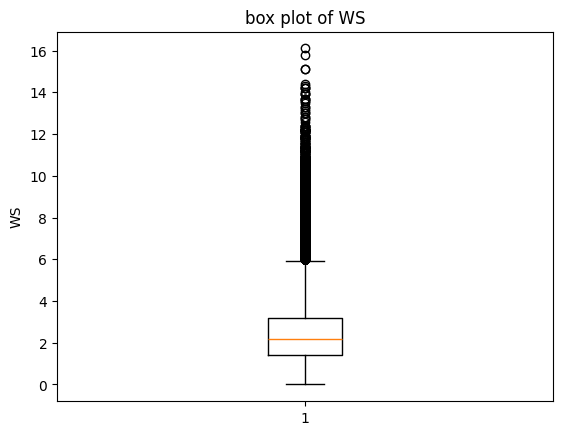

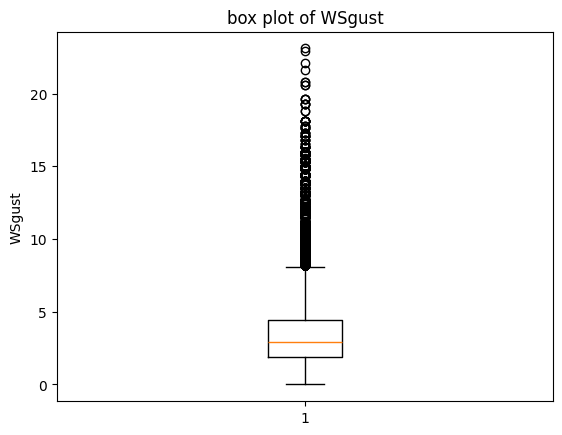

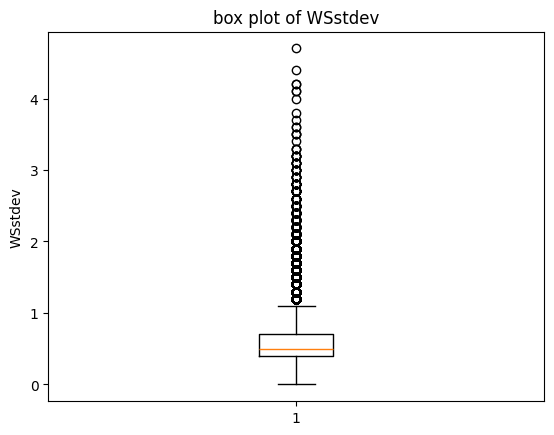

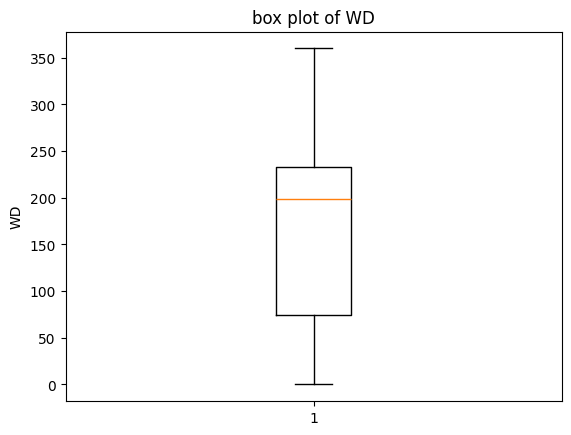

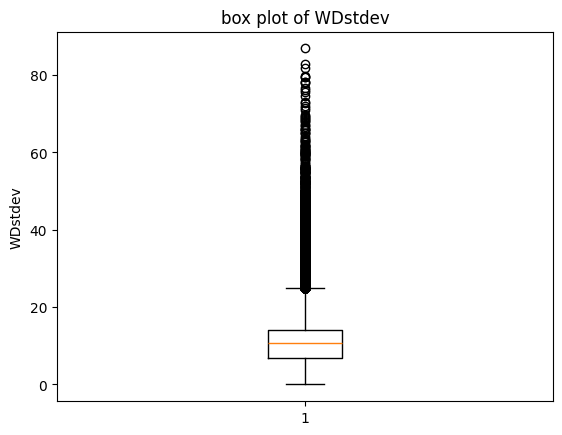

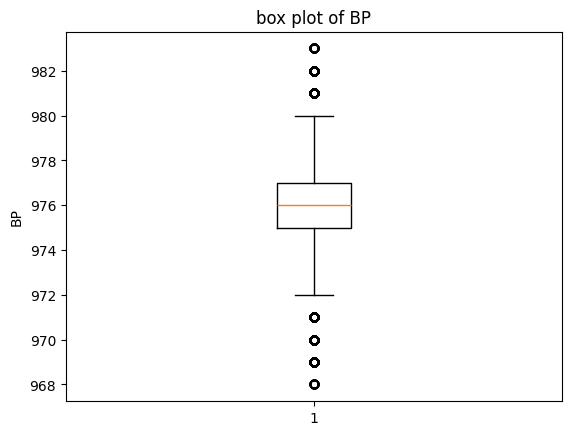

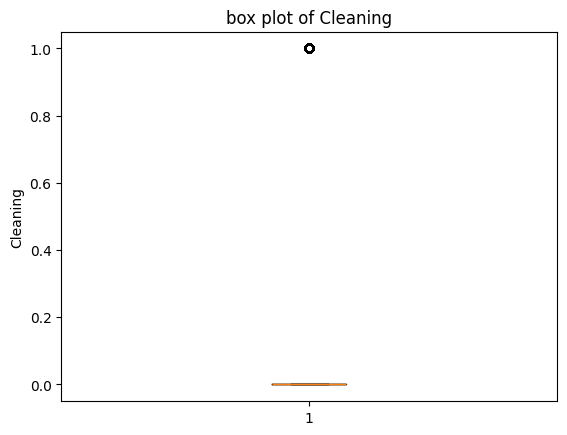

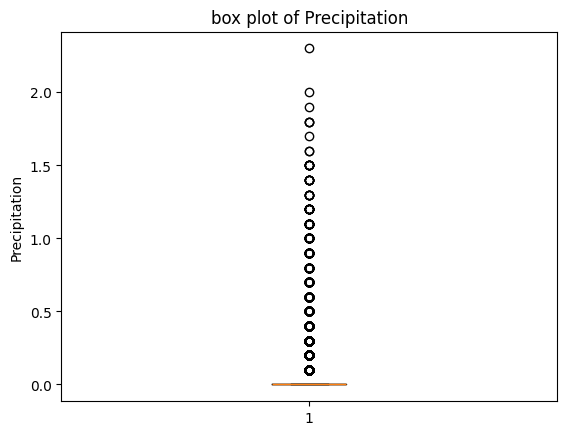

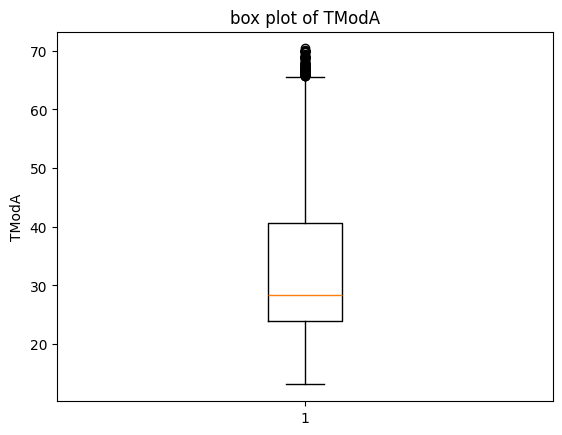

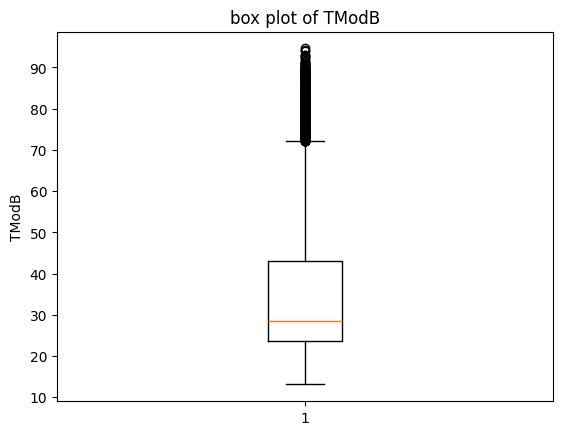

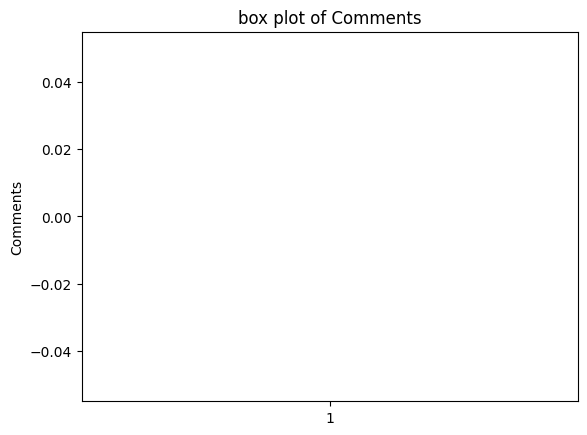

In [28]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert =True)
    plt.title(f"box plot of {c}")
    plt.ylabel(c)
    plt.show()

# Outlier Detection

In [29]:
# before calculating Z score, first we have to remove columns that have NaN values

df.dropna(axis=1, how="all", inplace=True)

In [30]:
# Z score method. it is know that this method is only for numerical columns. 
# the most common threshold value of z is 3. if z is above 3, so , that particular cell value is an outlier

num_cols = df.select_dtypes(include= [np.number]).columns.tolist() # num_cols is a list of numeric column names
z_scores = np.abs(stats.zscore(df[num_cols]))
threshold = 3
outliers = (z_scores>threshold)
outler_counts = pd.DataFrame(outliers, columns=num_cols).sum()
print(outler_counts)

GHI               305
DNI              1062
DHI              3415
ModA              137
ModB              206
Tamb                0
RH                  0
WS               3510
WSgust           3915
WSstdev          5753
WD                  0
WDstdev          3362
BP               1019
Cleaning          281
Precipitation    3338
TModA             153
TModB             609
dtype: int64


In [31]:
# Now lets keep rows whose z score value is less than or equal to 3

df_clean = df[(z_scores<=3).all(axis=1)]
# size of the  cleaned data
df_clean.shape

(505422, 18)

In [ ]:
# lets export the cleaned data
df_clean.to_csv("../data/cleaned_data_sierralone.csv", index = False)

# Time Analysis

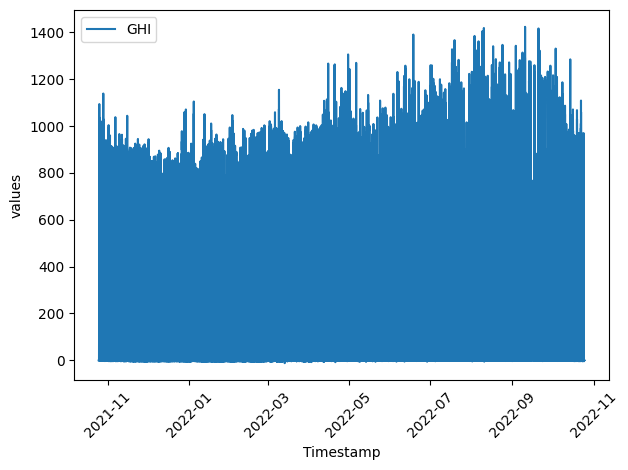

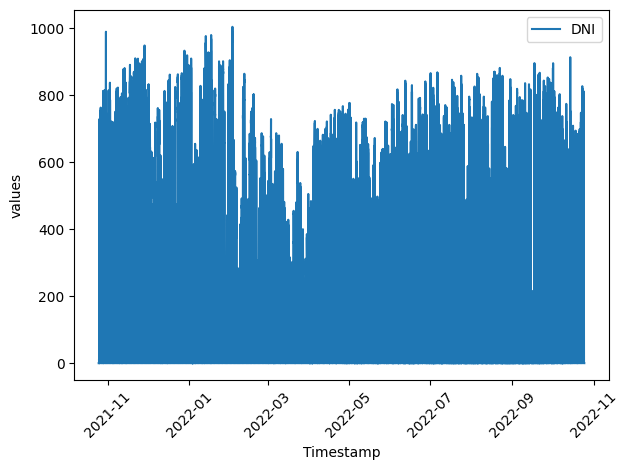

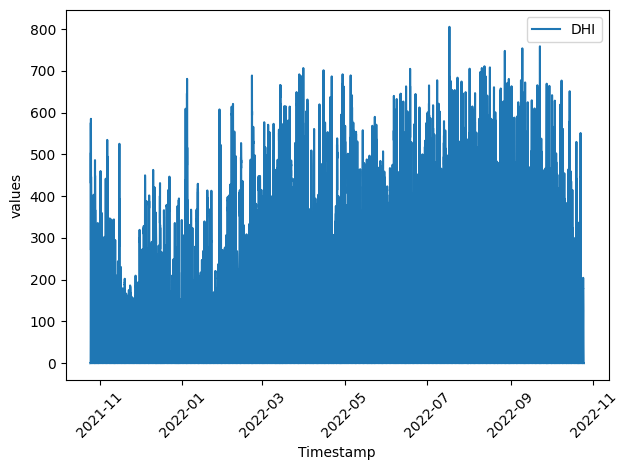

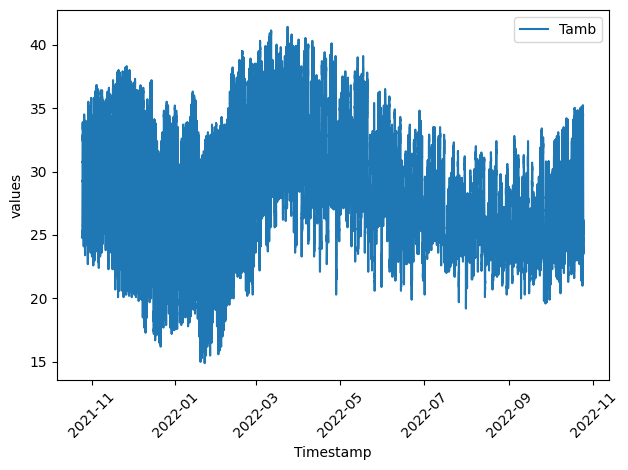

In [32]:
# Line charts of GHI, DNI, DHI, Tamb Vs Timestamp
# I have to ensure if the timestamp column is in a standard date time format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']
plt.Figure(figsize=(15,6))
for col in columns_to_plot:
    plt.plot(df['Timestamp'], df[col], label = col)
    plt.xlabel('Timestamp')
    plt.ylabel('values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

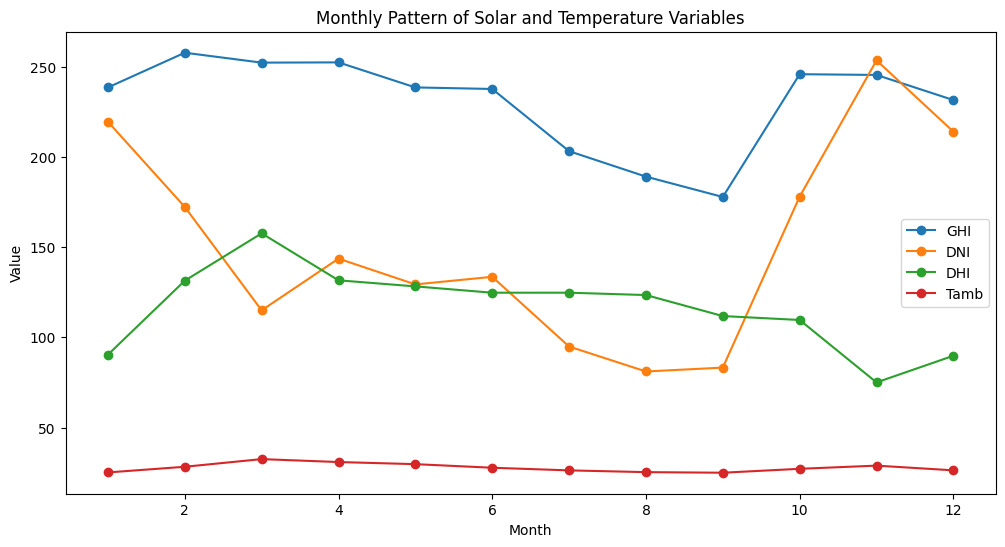

In [33]:
# Lets observe patterns by month, we need to extract the month from Timestamp column and then aggregate the data by mean per month.
df['Month'] = df['Timestamp'].dt.month  # .dt.month extracts the month as an integer (1 for January, 2 for February).
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(monthly_avg.index, monthly_avg[col], marker='o', label=col)

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Pattern of Solar and Temperature Variables')
plt.legend()
plt.show()

In [ ]:
# Cleaning Impact

In [34]:
# Group by Cleaning column and compute mean of ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_impact)

                ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


# Correlations and Relationship Analysis

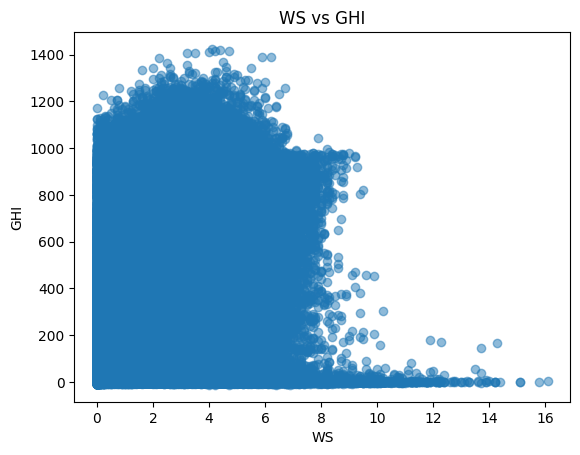

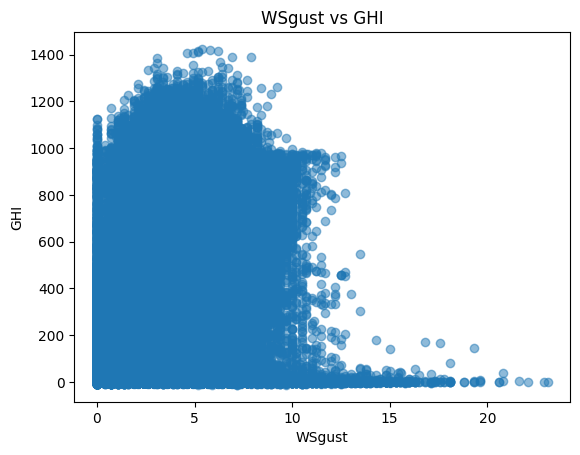

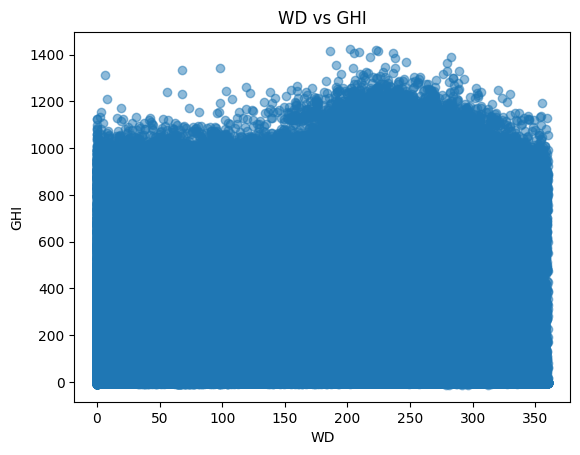

In [35]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

for col in ['WS', 'WSgust', 'WD']:
    plt.Figure(figsize=(6,4))
    plt.scatter(df[col], df['GHI'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('GHI')
    plt.title(f'{col} vs GHI')
    plt.show()

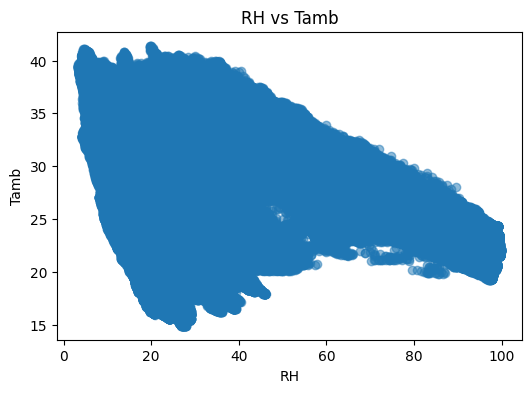

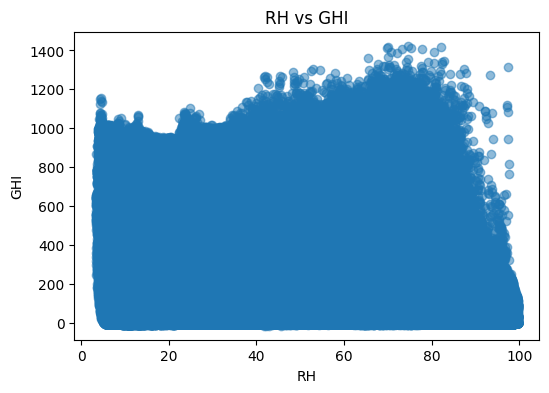

In [36]:
for col in ['Tamb', 'GHI']:
    plt.figure(figsize=(6,4))
    plt.scatter(df['RH'], df[col], alpha=0.5)
    plt.xlabel('RH')
    plt.ylabel(col)
    plt.title(f'RH vs {col}')
    plt.show()

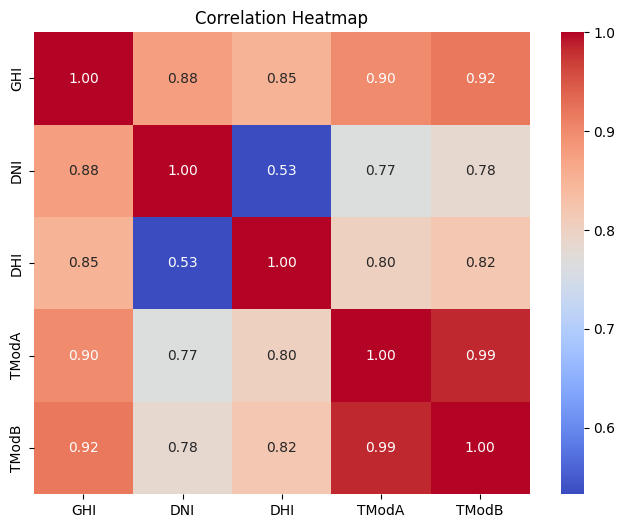

In [37]:
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
# Compute correlation matrix
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Wind & Distribution Analysis

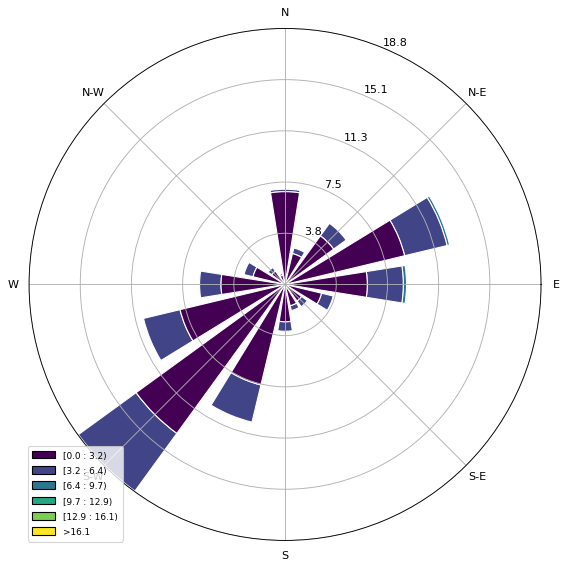

In [15]:
# Wind rose or radial bar plot of WS/WD.
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

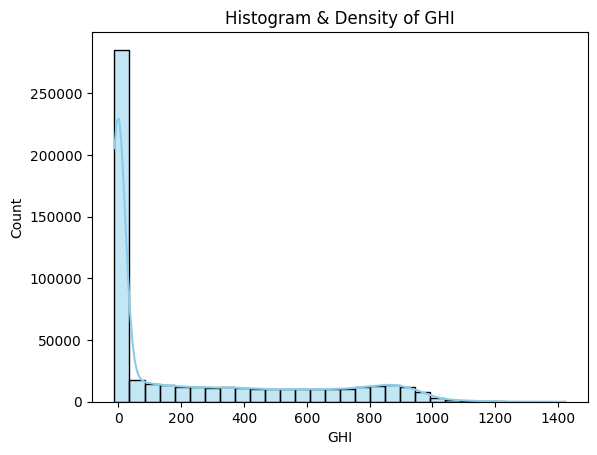

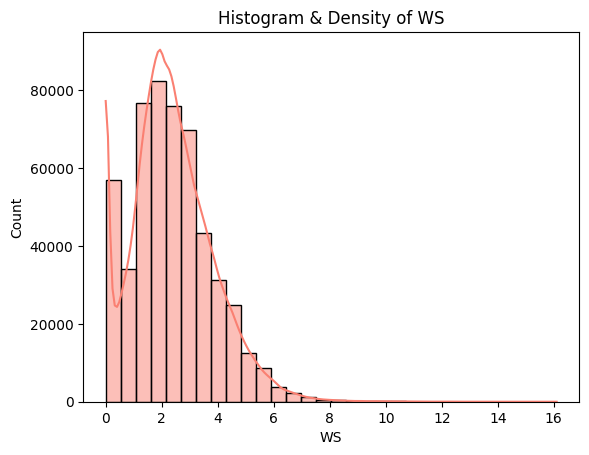

In [38]:
# Histogram + density for GHI
sns.histplot(df['GHI'], kde=True, bins=30, color='skyblue')
plt.title('Histogram & Density of GHI')
plt.show()

# Histogram + density for WS
sns.histplot(df['WS'], kde=True, bins=30, color='salmon')
plt.title('Histogram & Density of WS')
plt.show()

# Temperature Analysis

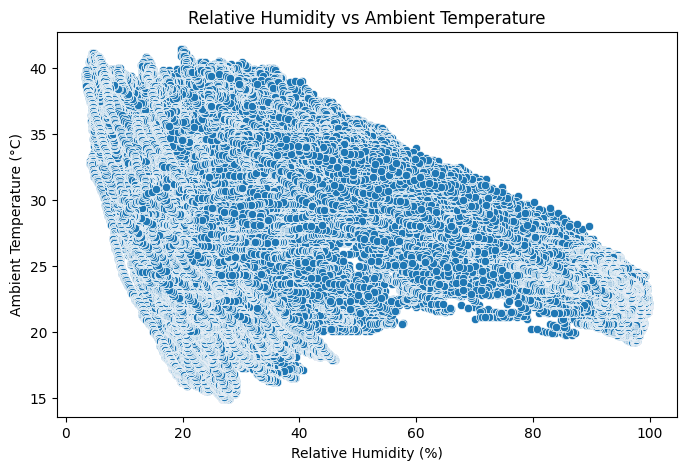

In [16]:
# Examine how relative humidity (RH) might influence temperature readings and solar radiation.
plt.figure(figsize=(8,5))
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

# Bubble Chart

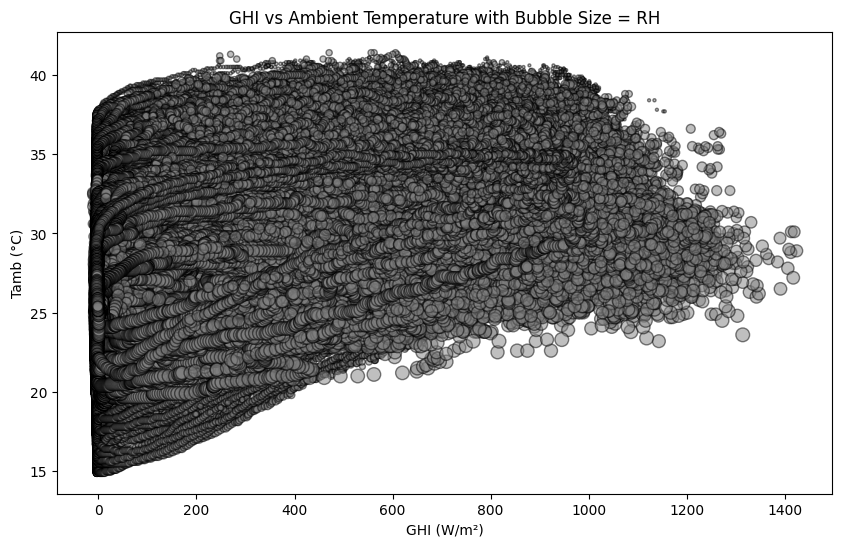

In [39]:
# GHI vs. Tamb with bubble size = RH or BP.
plt.figure(figsize=(10,6))

# Bubble chart
plt.scatter(
    x=df['GHI'], 
    y=df['Tamb'], 
    s=df['RH'],           # Bubble size
    alpha=0.5,            # Transparency
    c='gray',             # Bubble color
    edgecolor='k'         # Bubble edge color
)

plt.title('GHI vs Ambient Temperature with Bubble Size = RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.show()